# Build  Gemma 7b 🆚 Mixtral 8X7 and Haystack 2.x

<a target="_blank" href="https://colab.research.google.com/drive/1QoQ5vlgnfV2JA-96xRec3VWCGiZOckOM#scrollTo=I8Q51pZ5NI0L">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" width="200" alt="Open In Colab"/>
</a>

<img src="https://huggingface.co/blog/assets/gemma/Gemma-logo-small.png" width="200" style="display:inline;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://upload.wikimedia.org/wikipedia/commons/7/70/Street_Fighter_VS_logo.png" width="100" style="display:inline;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://codeandhack.com/wp-content/uploads/2023/12/Mixtral-8x7B-SMoE-Model.jpeg" width="250" style="display:inline;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://haystack.deepset.ai/images/haystack-ogimage.png" width="300" style="display:inline;">



We will see what we can build with the new [Google Gemma open models](https://blog.google/technology/developers/gemma-open-models/) VS [Mistral open models](https://mistral.ai/technology/#models) and the [Haystack LLM framework](https://haystack.deepset.ai/).

>[Build  Gemma 7b 🆚 Mixtral 8X7 and Haystack 2.x](#scrollTo=I8Q51pZ5NI0L)

>>[Installation](#scrollTo=1LRwBMJdF_d1)

>>[Authorization](#scrollTo=Lh60ZvTdGDdh)

>>[Chat with Gemma 🆚 Mixtral](#scrollTo=rfW8gRwpGZjc)

>>[RAG with Gemma 🆚 Mixtral](#scrollTo=7XAtaoEiHE6B)

>>>[Load data from PDF](#scrollTo=TCeqQB3kHqcz)

>>>[Indexing Pipeline](#scrollTo=h1fvmgsZH0i8)

>>>[RAG Pipelines](#scrollTo=Qk8v_s8xIdLV)

>>>[Let's ask some questions!](#scrollTo=DrKccbWeMyjB)



## Installation

In [ ]:
! pip install haystack-ai transformers==4.38.0 sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.37.2
    Uninstalling transformers-4.37.2:
      Successfully uninstalled transformers-4.37.2


## Authorization

- you need an Hugging Face account
- you need to accept Google conditions here: https://huggingface.co/google/gemma-7b-it and wait for the authorization

In [ ]:
import getpass, os


os.environ["HF_API_TOKEN"] = getpass.getpass("Your Hugging Face token")

Your Hugging Face token··········


## Chat with Gemma 🆚 Mixtral

For simplicity, we call the model using the free Hugging Face Inference API with the `HuggingFaceTGIChatGenerator`.

(We might also load it in Colab using the `HuggingFaceLocalChatGenerator` in a quantized version).

In [ ]:
from haystack.components.generators.chat import HuggingFaceTGIChatGenerator
from haystack.dataclasses import ChatMessage


gemma_gen = HuggingFaceTGIChatGenerator(
    model="google/gemma-7b-it",
    url="https://api-inference.huggingface.co/models/google/gemma-7b-it",
    generation_kwargs={"max_new_tokens": 350},
    #chat_template = chat_template
    )

gemma_gen.warm_up()

In [ ]:
mixtral_gen = HuggingFaceTGIChatGenerator(
    model="mistralai/Mistral-7B-Instruct-v0.1",
    url="https://api-inference.huggingface.co/models/mistralai/Mixtral-8x7B-Instruct-v0.1",
    generation_kwargs={"max_new_tokens": 350}
    )

mixtral_gen.warm_up()

In [ ]:
import pandas as pd

def run_chat(generators):
    chat_history = []

    while True:
        user_msg = input("Enter your message or Q to exit\n🧑 ")
        if user_msg == "Q":
            break

        chat_history_entry = {'Question': user_msg}

        for i, generator in enumerate(generators):
            # Passa solo l'ultimo messaggio dell'utente al generatore
            response = generator.run(messages=[ChatMessage.from_user(user_msg)])
            assistant_resp = response['replies'][0]
            print(f"🤖 Generator {i+1}: " + assistant_resp.content)
            chat_history_entry[f'Answer_Generator_{i+1}'] = assistant_resp.content

        chat_history.append(chat_history_entry)

    # Converti la cronologia della chat in un DataFrame
    df_chat_history = pd.DataFrame(chat_history)
    return df_chat_history




In [ ]:
generators = [gemma_gen, mixtral_gen]

In [ ]:
 df_chat = run_chat(generators)

Enter your message or Q to exit
🧑 Q


In [ ]:
 df_chat

""


## RAG with Gemma 🆚 Mixtral

### Load data from PDF

In [ ]:
!mkdir -p 'data/'
!wget --user-agent "Case" "https://cases.justia.com/federal/district-courts/california/candce/3:2020cv06754/366520/813/0.pdf" -O "data/Google_V_Sonos.pdf"

--2024-02-29 09:11:32--  https://cases.justia.com/federal/district-courts/california/candce/3:2020cv06754/366520/813/0.pdf
Resolving cases.justia.com (cases.justia.com)... 34.238.145.218, 52.4.77.46
Connecting to cases.justia.com (cases.justia.com)|34.238.145.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 282560 (276K) [application/pdf]
Saving to: ‘data/Google_V_Sonos.pdf’

data/Google_V_Sonos 100%[===================>] 275.94K  1.09MB/s    in 0.2s    

2024-02-29 09:11:32 (1.09 MB/s) - ‘data/Google_V_Sonos.pdf’ saved [282560/282560]



⚠️You can import your own PDF file❗

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
%%capture
!pip install PyPDF2

In [ ]:
import PyPDF2
from haystack import Document

pdf_file_path = "data/Google_V_Sonos.pdf"  # Replace with the path of your PDF file

def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()

    return text

pdf_text = extract_text_from_pdf(pdf_file_path)

# Creating the Haystack Document
doc = Document(
    content=pdf_text,
    meta={"pdf_path": pdf_file_path}
)

### Indexing Pipeline

In [ ]:
pip install chroma-haystack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.0/506.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 104.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 109.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 10.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 

In [ ]:
from haystack.components.fetchers import LinkContentFetcher
from haystack_integrations.document_stores.chroma import ChromaDocumentStore
from haystack_integrations.components.retrievers.chroma import ChromaEmbeddingRetriever

In [ ]:
from haystack import Pipeline
#from haystack.document_stores.in_memory import InMemoryDocumentStore
from haystack.components.preprocessors import DocumentCleaner, DocumentSplitter
from haystack.components.writers import DocumentWriter
from haystack.document_stores.types import DuplicatePolicy
from haystack.components.embedders import SentenceTransformersDocumentEmbedder

In [ ]:
document_store = ChromaDocumentStore()
document_embedder = SentenceTransformersDocumentEmbedder("BAAI/bge-large-en-v1.5")

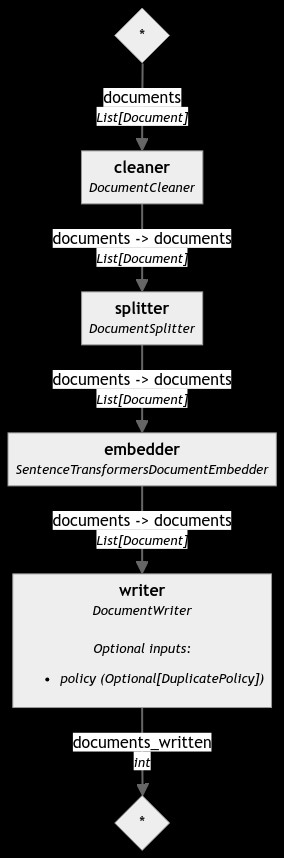

In [ ]:
indexing = Pipeline()


indexing.add_component("cleaner", DocumentCleaner())
indexing.add_component("splitter", DocumentSplitter(split_by="word", split_length=300))
indexing.add_component("embedder", document_embedder)
indexing.add_component("writer", DocumentWriter(document_store=document_store, policy=DuplicatePolicy.OVERWRITE))

indexing.connect("cleaner", "splitter")
indexing.connect("splitter", "embedder")
indexing.connect("embedder", "writer")

In [ ]:
indexing.run({"cleaner":{"documents":[doc]}})

/usr/local/lib/python3.10/dist-packages/sentence_transformers/SentenceTransformer.py:92: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v3 of SentenceTransformers.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/779 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'writer': {'documents_written': None}}

In [ ]:
document_store.filter_documents()[0].content

'1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 United States District Court Northern District of California UNITED STATES DISTRICT COURT NORTHERN DISTRICT OF CALIFORNIA SONOS, INC. , Plaintiff , v. GOOGLE LLC , Defendant . No. C 20 -06754 WHA No. C 21 -07559 WHA (Consolidated) MEMORANDUM OPINION RE SONOS’S DAMAGES THEORY INTRODUCTION This memorandum opinion explains an oral ruling that struck a major part of plaintiff’s damages theory before jury deliberations began . Sonos , Inc. sued Google LLC for patent infringement . Google sued Sonos for a declaratory judgment . The related actions were consolidated for trial , which concluded two weeks ago . The final pretrial order had deferred ruling on two of Google’s motions in limine , caution ing that there were “serious questions about Sonos’s damages theory and associated opinion ,” but allow ing Sonos to put on the contested evidence “with the understanding that the undersigned may strike it from the record,

In [ ]:
len(document_store.filter_documents())

27

### RAG Pipelines

In [ ]:
from haystack.components.builders import PromptBuilder

prompt_template = """ Answer the question, based on the
content in the documents. If you can't answer based on the documents, say so.

Documents:
{% for doc in documents %}
  {{doc.content}}
{% endfor %}

question: {{question}}
"""
prompt_builder = PromptBuilder(template=prompt_template)

Here, we use the `HuggingFaceTGIGenerator` since it is not a chat setting and we don't envision multi-turn conversations but just RAG.

In [ ]:
from haystack.components.generators import HuggingFaceTGIGenerator
from haystack.components.embedders import SentenceTransformersTextEmbedder

mixtral_gen = HuggingFaceTGIGenerator(
    model="mistralai/Mistral-7B-Instruct-v0.1",
    #generation_kwargs={"max_new_tokens": 500}
    )

mixtral_gen.warm_up()

tokenizer_config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

In [ ]:
from haystack.components.embedders import SentenceTransformersTextEmbedder

text_embedder = SentenceTransformersTextEmbedder(model="BAAI/bge-large-en-v1.5")
retriver = ChromaEmbeddingRetriever(document_store=document_store)

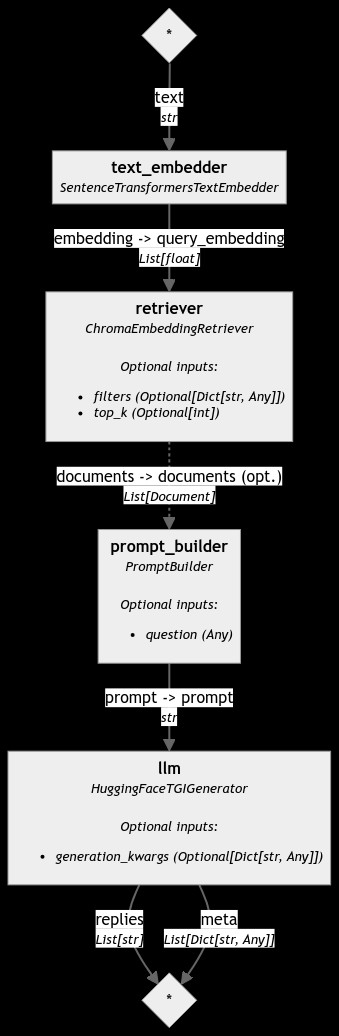

In [ ]:
from haystack.components.embedders import SentenceTransformersTextEmbedder

mixtral_rag = Pipeline()
mixtral_rag.add_component("text_embedder",text_embedder)
mixtral_rag.add_component("prompt_builder", prompt_builder)
mixtral_rag.add_component("retriever", retriver)
mixtral_rag.add_component("llm", mixtral_gen)

mixtral_rag.connect("text_embedder.embedding", "retriever.query_embedding")
mixtral_rag.connect("retriever.documents", "prompt_builder.documents")
mixtral_rag.connect("prompt_builder.prompt", "llm.prompt")

In [ ]:
def run_query_pipeline(question, llm):
    data = {
        "text_embedder": {"text": question},
        "retriever": {"top_k": 3},
        "prompt_builder": {"question": question},
        "llm": {"generation_kwargs": {"max_new_tokens": 350}}
    }
    result = llm.run(data)
    return result['llm']['replies'][0]

In [ ]:
print(run_query_pipeline("Summarize what happened in Google v. Sonos", mixtral_rag))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

.

Answer: Google v. Sonos was a patent infringement lawsuit between Google and Sonos, Inc. The lawsuit involved two patents -in-suit, U.S. Patent Nos. 10,848,885 and 10,496,966, which covered technology for customizing and saving overlapping groups of smart speakers or other “zone players” according to a common theme, and then later invoking such groups, called “zone scene s,” on demand. The accused products and requested damages differed between the two patents. With respect to the ’885 patent, Sonos accused Google media players, while with respect to the ’966 patent, Sonos accused all smartphones and other computing devices that had or had the Google Home app licensed installed. To calculate damages, Mr. Malackowski assumed that Sonos and Google would have used a subscription price of a third-party application offered on the Google Play Store in hypothetical patent licensing negotiations, apportioning this price to arrive at a hypothetical royalty. However, during the hypothetical n

In [ ]:
gemma_prompt_template = """
<start_of_turn>user
Using the information contained in the context, give a comprehensive answer to the question.
If the answer is contained in the context, also report the source PAGE.
If the answer cannot be deduced from the context, do not give an answer.

Context:
  {% for doc in documents %}
  {{ doc.content }} PAGE:{{ doc.meta['page'] }}
  {% endfor %};
  Question: {{query}}<end_of_turn>

<start_of_turn>model
"""
gemma_prompt_builder = PromptBuilder(template=prompt_template)

In [ ]:
gemma_gen = HuggingFaceTGIGenerator(
    model="google/gemma-7b-it",
    url="https://api-inference.huggingface.co/models/google/gemma-7b-it"
    #generation_kwargs={"max_new_tokens": 500}
    )

gemma_gen.warm_up()

tokenizer_config.json:   0%|          | 0.00/2.16k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/888 [00:00<?, ?B/s]

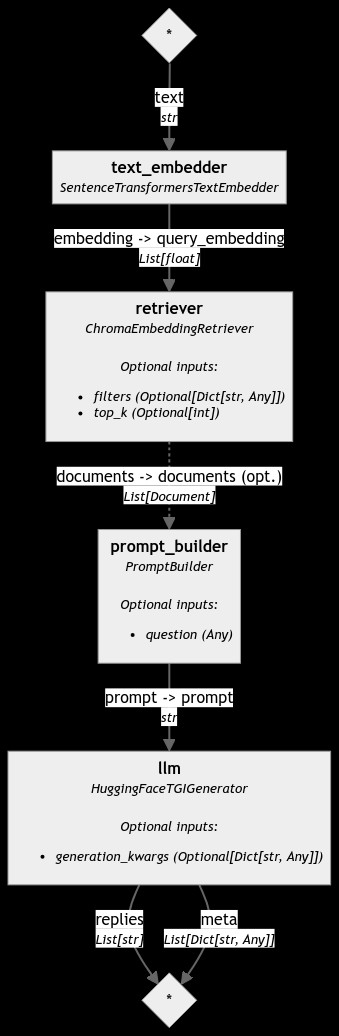

In [ ]:
gemma_rag = Pipeline()
gemma_rag.add_component("text_embedder",SentenceTransformersTextEmbedder("BAAI/bge-large-en-v1.5"))
gemma_rag.add_component("prompt_builder", gemma_prompt_builder)
gemma_rag.add_component("retriever", ChromaEmbeddingRetriever(document_store=document_store))
gemma_rag.add_component("llm", gemma_gen)

gemma_rag.connect("text_embedder.embedding", "retriever.query_embedding")
gemma_rag.connect("retriever.documents", "prompt_builder.documents")
gemma_rag.connect("prompt_builder.prompt", "llm.prompt")

In [ ]:
print(run_query_pipeline("Summarize what happened in Google v. Sonos", gemma_rag))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

 in this document.

The document describes a case of patent infringement between Google and Sonos. In this case, the court struck a major part of Sonos's damages theory before jury deliberations began. The court found that Sonos had not innovated the claimed invention and that Google was the owner of the app store. As a result, the court granted Google's first motion in limine and denied Google's second motion in limine as moot.


### Let's ask some questions!

In [ ]:
import pandas as pd

def run_queries_on_multiple_llms(query_list, llm_list):
    # Create an empty DataFrame to collect the results
    results_df = pd.DataFrame(columns=['Query'] + [f'LLM_{i+1}_Response' for i in range(len(llm_list))])

    # Iterate over each query in the list of queries
    for query in query_list:
        # Create a dictionary to collect responses for the current query
        query_responses = {'Query': query}

        # Iterate over each LLM in the list of LLMs
        for i, llm in enumerate(llm_list):
            # Execute the query using the run_query_pipeline function and the current LLM
            response = run_query_pipeline(query, llm)

            # Add the response to the responses dictionary
            query_responses[f'LLM_{i+1}_Response'] = response

        # Add the responses dictionary to the results DataFrame
        results_df = results_df.append(query_responses, ignore_index=True)

    # Return the complete results DataFrame
    return results_df

In [ ]:
questions_to_try ="""What specific patents does Sonos claim Google has infringed upon in their multi-room audio technology?
How has Google responded to the allegations of patent infringement made by Sonos?
What are the key legal arguments presented by Sonos in their lawsuit against Google?
Has the International Trade Commission (ITC) made any preliminary rulings or decisions regarding the patent infringement claims between Google and Sonos?
What are the potential implications for both Google and Sonos depending on the outcome of the legal dispute?""".split('\n')

In [ ]:
rag_list = [gemma_rag, mixtral_rag]  # Replace llm1, llm2... with actual language model instances

# Get the DataFrame with responses
results_dataframe = run_queries_on_multiple_llms(questions_to_try, rag_list)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-39-f4b482f92c01>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(query_responses, ignore_index=True)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-39-f4b482f92c01>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(query_responses, ignore_index=True)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-39-f4b482f92c01>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(query_responses, ignore_index=True)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-39-f4b482f92c01>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(query_responses, ignore_index=True)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-39-f4b482f92c01>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(query_responses, ignore_index=True)


In [ ]:
results_dataframe

,Query,LLM_1_Response,LLM_2_Response
0,What specific patents does Sonos claim Google ...,\n\nThe text does not describe the specific pa...,\n\nAnswer: Sonos claims that Google has infri...
1,How has Google responded to the allegations of...,"\n\nBased on the documents provided, Google ha...",\n\nAnswer: Google has responded to the allega...
2,What are the key legal arguments presented by ...,\n\nThe text does not describe the key legal a...,\n\nAnswer: Sonos's key legal arguments in the...
3,Has the International Trade Commission (ITC) m...,"The text does not mention the ITC, therefore ...","\n\nAnswer: No, the documents do not mention a..."
4,What are the potential implications for both G...,"\n\nBased on the content in the documents, I a...",\n\nAnswer: The potential implications for bot...


This is a simple demo.
We can improve the RAG Pipeline using better retrieval techniques...